In [37]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

avgwages = pd.read_csv('downloads/average_wages.csv')

In [38]:
avgwages.head()

,Year,Geography,Type of work,Education level,Sex,Age group,Wages,Value
0,1997,Canada,Both full- and part-time,"Total, all education levels",Male,15 years and over,Total employees,5954.5
1,1998,Canada,Both full- and part-time,"Total, all education levels",Male,15 years and over,Total employees,6060.1
2,1999,Canada,Both full- and part-time,"Total, all education levels",Male,15 years and over,Total employees,6203.8
3,2000,Canada,Both full- and part-time,"Total, all education levels",Male,15 years and over,Total employees,6427.6
4,2001,Canada,Both full- and part-time,"Total, all education levels",Male,15 years and over,Total employees,6520.2


In [49]:
avgwages.describe()

,Year,Geography,Type of work,Education level,Sex,Age group,Wages,Value
count,633600.000000,633600.00000,633600.000000,633600.000000,633600.0,633600.00000,633600.000000,633600.000000
mean,2006.500000,5.00000,1.000000,5.500000,0.5,3.50000,2.000000,235.271716
std,5.766286,3.16228,0.816497,3.452055,0.5,2.29129,1.414215,362.919846
min,1997.000000,0.00000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000
25%,2001.750000,2.00000,0.000000,2.750000,0.0,1.75000,1.000000,10.870000
50%,2006.500000,5.00000,1.000000,5.500000,0.5,3.50000,2.000000,22.460000
75%,2011.250000,8.00000,2.000000,8.250000,1.0,5.25000,3.000000,400.000000
max,2016.000000,10.00000,2.000000,11.000000,1.0,7.00000,4.000000,7698.300000


In [40]:
avgwages.isnull().sum()
# no null values

Year               0
Geography          0
Type of work       0
Education level    0
Sex                0
Age group          0
Wages              0
Value              0
dtype: int64

In [55]:
avgwages["Sex"].value_counts()

1    316800
0    316800
Name: Sex, dtype: int64

In [41]:
avgwages['Geography'].unique()

array(['Canada', 'Newfoundland and Labrador', 'Prince Edward Island',
       'Nova Scotia', 'New Brunswick', 'Quebec', 'Ontario', 'Manitoba',
       'Saskatchewan', 'Alberta', 'British Columbia'], dtype=object)

In [45]:
label_encoder = LabelEncoder()
avgwages['Geography'] = label_encoder.fit_transform(avgwages['Geography'])
avgwages['Type of work'] = label_encoder.fit_transform(avgwages['Type of work'])
avgwages['Education level'] = label_encoder.fit_transform(avgwages['Education level'])
avgwages['Sex'] = label_encoder.fit_transform(avgwages['Sex'])
avgwages['Age group'] = label_encoder.fit_transform(avgwages['Age group'])
avgwages['Wages'] = label_encoder.fit_transform(avgwages['Wages'])

In [46]:
values = avgwages.iloc[:,:-1].values
values

array([[1997,    2,    2, ...,    1,    0,    4],
       [1998,    2,    2, ...,    1,    0,    4],
       [1999,    2,    2, ...,    1,    0,    4],
       ...,
       [2014,    1,    1, ...,    0,    7,    3],
       [2015,    1,    1, ...,    0,    7,    3],
       [2016,    1,    1, ...,    0,    7,    3]], dtype=int64)

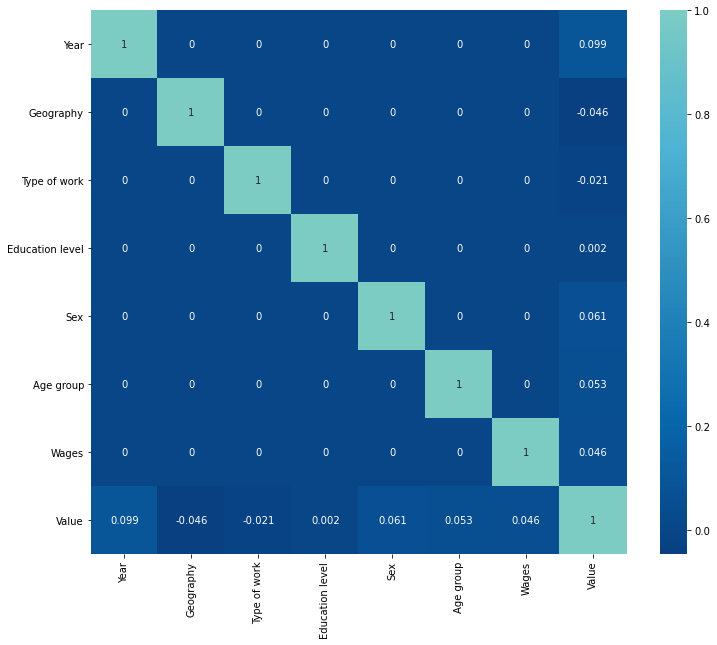

In [47]:
correlations = avgwages.corr()
fig = plt.figure(figsize=(12, 10))
sns.heatmap(correlations, annot=True, cmap='GnBu_r', center=1)

Text(0.5, 1.0, 'Value vs Year')

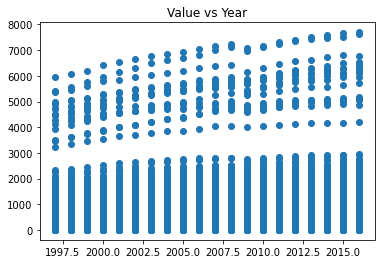

In [60]:
# salary vs year
plt.scatter(avgwages.Year,avgwages.Value)
plt.title('Value vs Year')

# salary data range they took per year is about the same?...

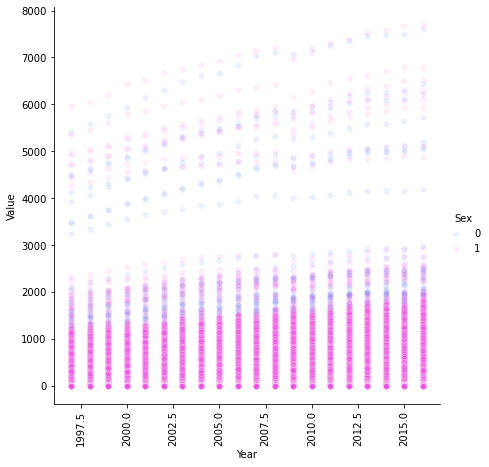

In [61]:
grid = sns.pairplot(
    data=avgwages,
    hue='Sex',
    palette=sns.color_palette(["#4271ff", "#ff4fea"]),
    x_vars=['Year'],
    y_vars=['Value'],
    diag_kind = None,
    height=6,
    plot_kws={'alpha':0.1},
)
# Rotate x-axis on each plot so they are readable
for ax in grid.axes.flat[:]:
    ax.tick_params(axis='x', labelrotation=90)
    
# gender salary trend appears the same throughout the years as well